In [59]:
# Gathering dependencies


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Data loading from csv to datframe

parkinson_data=pd.read_csv('C:/Users/ayush/Desktop/ml_project/parkinsons.csv')

parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,NaN,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [61]:
#information about dataset
parkinson_data.shape
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [62]:
#check for missing values
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                5
DFA                 0
spread1             4
spread2             0
D2                  0
PPE                 0
dtype: int64

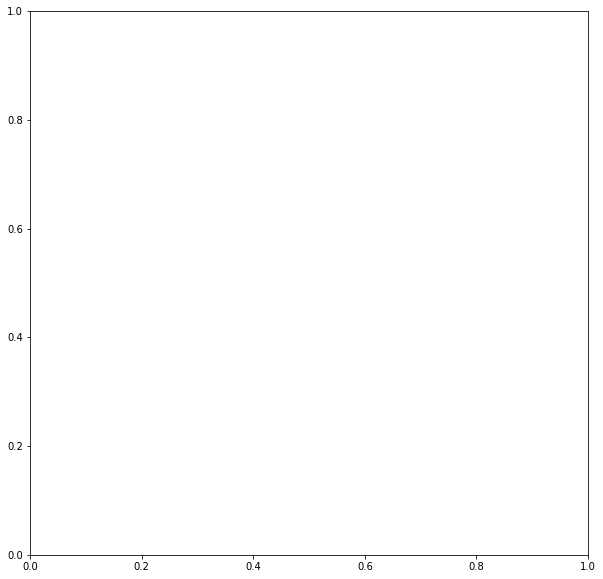

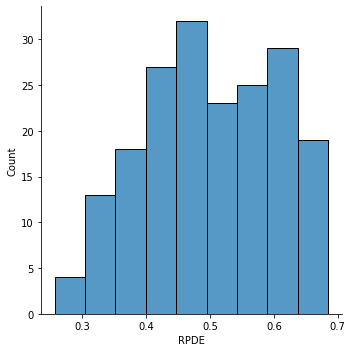

In [66]:
# data preprocessing filling in missing/NULL values
# for RPDE
fig, ax=plt.subplots(figsize=(10,10))
sns.displot(parkinson_data.RPDE)


We will be using mean for imputation of missing data as we see the mean values very well defines the values


In [67]:
parkinson_data['RPDE'].fillna(parkinson_data['RPDE'].mean(),inplace=True)


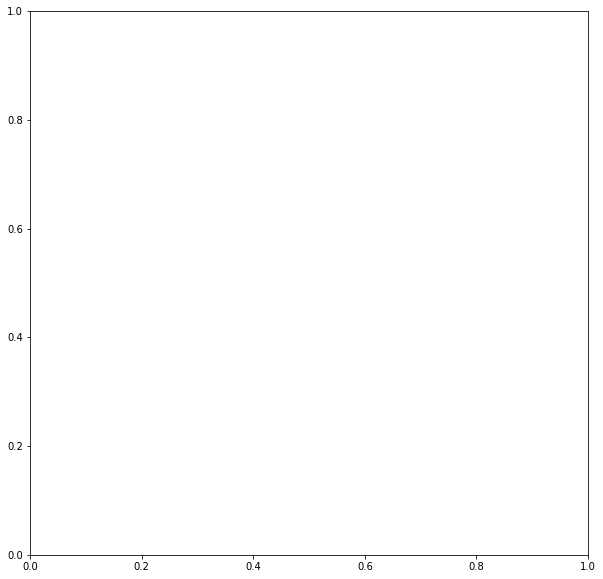

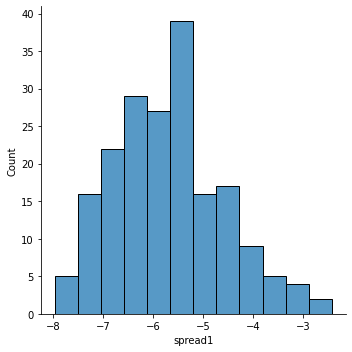

In [63]:
# now for spread1
fig, ax=plt.subplots(figsize=(10,10))
sns.displot(parkinson_data.spread1)


In [64]:
parkinson_data['spread1'].fillna(parkinson_data['spread1'].mean(),inplace=True)

checking if our values are correct now


In [68]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

we have filled out the missing values now we will see some more features of data

In [11]:
#  statiistical values of data
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [16]:
#Seperating target variable
# here the cloumn status is our target variable
print(parkinson_data.status)

parkinson_data['status'].value_counts()


0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


1    147
0     48
Name: status, dtype: int64

0 is positive (i.e) people with parkison

In [13]:
#grouping data as per whether they have parkinson or not

parkinson_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [21]:
 #Data preprocessing

 # seperating target variable
 # A-> parkinson data
 # B-> parkinson status

A=parkinson_data.drop(columns=['name','status'],axis=1)
B=parkinson_data['status']

In [22]:
print(A)
print('*************************************************************************************')


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [27]:
# splitting the data into training and testing data

A_train,A_test,B_train,B_test=train_test_split(A,B,
test_size=0.1,random_state=3)




Since the data we have is small we will put larger amount of data into train 


In [28]:
print(A.shape,A_train.shape,A_test.shape)

(195, 22) (175, 22) (20, 22)


In [29]:
# normalizing the values
#scaler=MinMaxScaler()
scaler=StandardScaler()


In [31]:
scaler.fit_transform(A_train)

array([[-0.8018426 , -0.6349701 , -0.39970565, ...,  0.25301014,
        -1.00090299, -0.42536886],
       [-1.02710932,  4.32968323, -0.19827121, ...,  0.97140289,
        -1.22777564,  0.23821636],
       [-0.9305423 , -0.61133438, -0.11491032, ...,  0.11118506,
        -0.14861266,  2.39503167],
       ...,
       [-0.82813297, -0.7935518 , -0.24994991, ..., -0.0975391 ,
         0.37445529, -0.4014294 ],
       [ 1.05154409,  0.39866445,  1.35034503, ...,  1.56284365,
         2.12981496,  2.91285681],
       [ 0.01253123, -0.36850685,  0.65402561, ..., -0.48472836,
        -0.68958499, -1.14610781]])

In [32]:
A_test=scaler.transform(A_test)
print(A_test)

[[ 1.17389450e+00  1.60061934e-01  1.84812274e+00 -1.00685327e+00
  -1.06465050e+00 -8.66920800e-01 -9.62375137e-01 -8.65732153e-01
  -1.13986977e+00 -1.08657611e+00 -1.14722779e+00 -1.04188956e+00
  -1.10223598e+00 -1.14763975e+00 -6.42309528e-01  2.65699278e+00
  -1.50397099e+00  4.33393571e-01 -2.15325359e+00 -7.35567087e-01
  -2.57962071e+00 -1.87249331e+00]
 [-1.21092464e+00  9.89651780e-02 -8.65342005e-01  6.56643438e-02
   5.45586023e-01 -1.29036821e-02  1.79670530e-01 -1.29411718e-02
   5.04715210e-01  6.01119317e-01  2.18526929e-01  4.59844101e-01
   9.70615990e-01  2.18882272e-01  1.71056354e-01  3.36491844e-02
   2.50593702e-01  3.60935318e-01  1.10472332e-01  1.39094457e-01
   1.22668410e+00  1.68836241e-01]
 [-4.13773129e-02 -3.73273810e-01 -9.14288692e-01 -7.33420209e-01
  -7.17344586e-01 -7.63053853e-01 -7.79817651e-01 -7.61858364e-01
  -6.30510948e-01 -6.70353927e-01 -5.03248508e-01 -7.09395627e-01
  -7.49294585e-01 -5.03638335e-01 -4.85516105e-01  7.15943084e-01
  -2.0

In [38]:
# create model

model=svm.SVC(kernel='linear')


mention of kerner is linear is req


In [39]:
#train model
model.fit(A_train,B_train)

SVC(kernel='linear')

MODEL EVALUATION


In [69]:
#checking accuracy score
#on training data
A_train_predict=model.predict(A_train)
training_accuracy=accuracy_score(B_train,A_train_predict)


In [70]:
print('accuracy of training data',training_accuracy)

accuracy of training data 0.8742857142857143


In [76]:
A_test_predict=model.predict(A_test)
training_acc=accuracy_score(B_test,A_test_predict)


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [77]:
print('accuracy of training data',training_acc)

accuracy of training data 0.85


Since we are seeing that the accuracy score between the test data and training data is very low we assume our model to note be overfit

In [1]:
inpu=[]
print('Enter the data for user')
MDVP_Fo_hz_=input('MDVP:Fo(Hz)')
inpu.append(MDVP_Fo_hz_)
MDVP_Fhi=input('MDVP:Fhi(Hz)')
inpu.append(MDVP_Fhi)
MDVPflo=input('MDVP:Flo(Hz)')
inpu.append(MDVPflo)
mdvp_jitter=input('MDVP:Jitter(Hz)(%)')
inpu.append(mdvp_jitter)
mdvp_jitter2=input('MDVP:Jitter(abs')
inpu.append(mdvp_jitter2)
mdvp_rap=input('MDVP:RAP')
inpu.append(mdvp_rap)
mdvp_ppq=input('MDVP:PPQ')
inpu.append(mdvp_ppq)
jitter_ddp=input('Jitter DDP')
inpu.append(jitter_ddp)
mdvp_shimmer=input('MDVP:SHimmer')
inpu.append(mdvp_shimmer)
mdvp_shimmer2=input('MDVP:SHimmer(db)')
inpu.append(mdvp_shimmer2)
shimmer=input('Shimmer:APQ3')
inpu.append(shimmer)
shimmer2=input('Shimmer:APQ5')
inpu.append(shimmer2)
mdvp_apq=input('MDVP:APQ')
inpu.append(mdvp_apq)
shimmer3=input('Shimmer:DDA')
inpu.append(shimmer3)
nhr=input('NHR')
inpu.apppend(nhr)
hnr=input('HNR')
inpu.append(hnr)
rpde=input('RPDE')
inpu.append(rpde)
dfa=input('DFA')
inpu.append(dfa)
spread1=input('Spread1')
inpu.append(spread1)
spread2=input('Spread2')
inpu.append(spread2)
d2=input('D2')
inpu.append(d2)
ppe=input('PPE')
inpu.append(ppe)
input_data=np.asarray(inpu)
input_data_reshape=input_data.reshape(1,-1)
std_input=scaler.transform(input_data_reshape)
pred=model.predict(std_input)

if(pred):
    print("the person has parkinson")
else:
    print('the person dose not have parkinson')

Enter the data for user
